# Preamble

In [1]:
import time
import collections
from numpy import *
import random as rand
from scipy import stats as st
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams["font.size"] = 16
plt.rcParams["font.weight"] = "normal"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'


def timing(func): # show execution time of functions 
    def wrapper(*args, **kwargs): 
        start = time.time()
        result = func(*args, **kwargs) 
        end = time.time()
        print(f'Run time: {(end - start):.4f} sec') 
        return result 
    return wrapper

# Random $n$ cut cake generator

Theoretical Expectation: 42084
Intersections: 41780
Pieces: 42281

Run time: 0.4498 sec


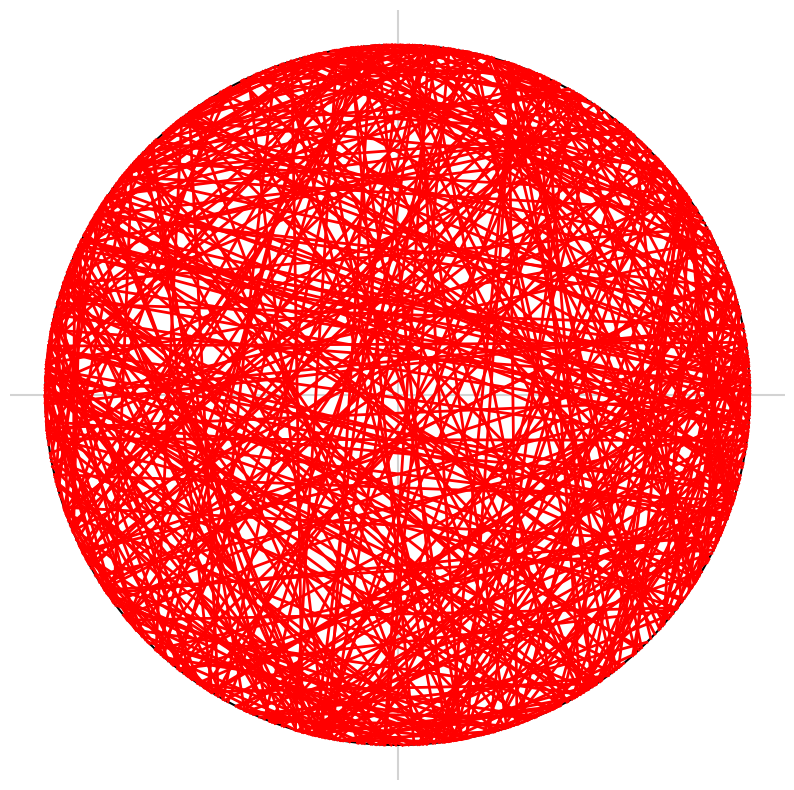

In [20]:
def draw_cake(cake_pieces):
    theta = linspace(0, 2 * pi, int(1e6))
    plt.figure(figsize=(10, 10), dpi=100)
    plt.axis('off')
    plt.axvline(color='lightgray')
    plt.axhline(color='lightgray')
    plt.plot(sin(theta), cos(theta), "k")
    
    theta1, theta2 = cake_pieces.T[0], cake_pieces.T[1]
    plt.plot([cos(theta1 + pi/2), cos(theta2 + pi/2)], [sin(theta1 + pi/2), sin(theta2 + pi/2)], linewidth=2, color='red') # +pi/2 added so that theta=0 is along the y-axis
    

@timing
def main(num_cuts):
    cake_pieces = [list(sort([rand.uniform(0, 2 * pi), rand.uniform(0, 2 * pi)])) for i in range(num_cuts)]
    draw_cake(array(cake_pieces))
    
    total_intersections = 0
    for i in range(num_cuts): #intersection counting by iterating over all cuts
        for j in range(num_cuts - i):
            if (cake_pieces[j][0] < cake_pieces[0][0] < cake_pieces[j][1]) ^ (cake_pieces[j][0] < cake_pieces[0][1] < cake_pieces[j][1]): # XOR conditions
                total_intersections += 1
        cake_pieces.pop(0)

    expectation = int((1/6) * num_cuts * num_cuts + (5/6) * num_cuts + 1) # Analytical expectation
    print(f"Theoretical Expectation: {expectation}")
    print(f"Intersections: {total_intersections}")
    print(f"Pieces: {total_intersections + num_cuts + 1}\n")


main(num_cuts = 500) # Change to the number of cuts you want

# Simulation for the expectation value $\langle P(n) \rangle$

<P(n)> = 0.1667584007886798n^2 + 0.8289487120464055n + 1.0575722506519216 

Run time: 1631.0796 sec


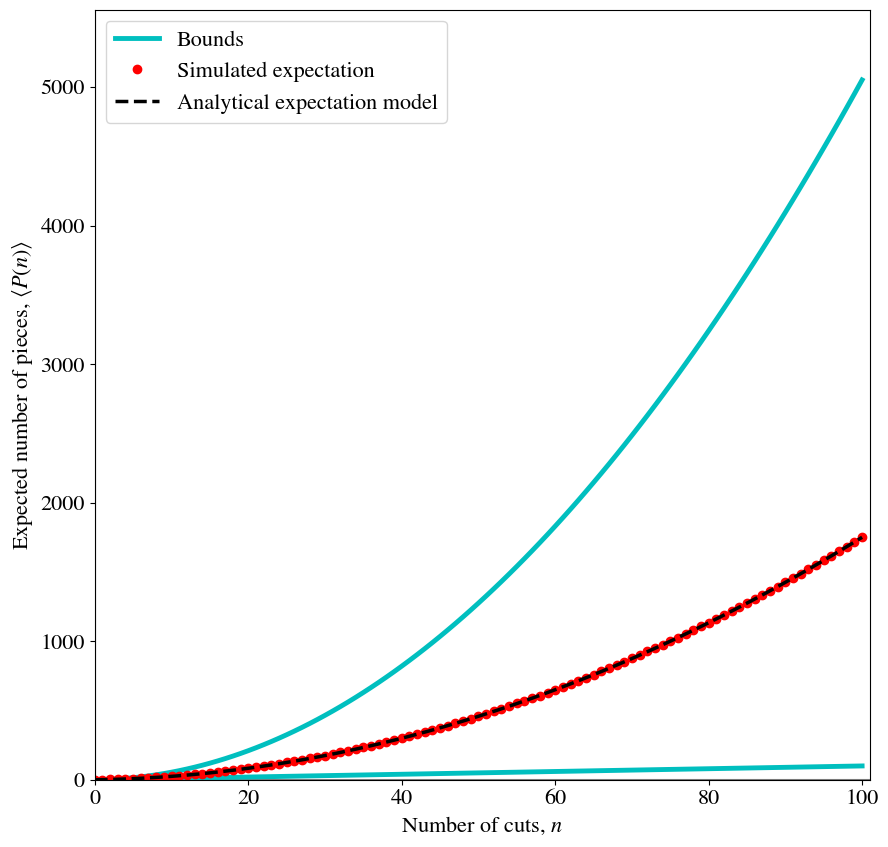

In [56]:
def count_pieces(num_cuts):
    cake_pieces = [list(sort([rand.uniform(0, 2 * pi), rand.uniform(0, 2 * pi)])) for i in range(num_cuts)] # create cuts using random choice
    total_intersections = 0 
    for i in range(num_cuts): #intersection counting by iterating over all cuts
        for j in range(num_cuts - i):
            if (cake_pieces[j][0] < cake_pieces[0][0] < cake_pieces[j][1]) ^ (cake_pieces[j][0] < cake_pieces[0][1] < cake_pieces[j][1]): # XOR conditions
                total_intersections += 1
        cake_pieces.pop(0)
    return total_intersections + num_cuts + 1


@timing
def main(num_cuts, num_loops):
    simulated_expectation = [mean([count_pieces(cut) for i in range(num_loops)]) for cut in range(num_cuts + 1)] # list of all expectations for cuts 1-100
    cut_range = linspace(0, num_cuts, num_cuts + 1)
    
    [a, b, c] = polyfit(cut_range, simulated_expectation, 2, cov=False)
    print(f"<P(n)> = {a}n^2 + {b}n + {c}\n")
    
    plt.figure(figsize=(10, 10), dpi=100)
    plt.axvline(color='gray')
    plt.axhline(color='gray')
    plt.xlim(- 0, max(cut_range) + 1)
    plt.ylim(- 0, 1.1 * max(0.5 * (cut_range * cut_range + cut_range + 2)))
    plt.xlabel(r'Number of cuts, $n$')
    plt.ylabel(r'Expected number of pieces, $\langle P(n) \rangle$')
    
    low_bound = cut_range + 1
    upp_bound = 0.5 * (cut_range * cut_range + cut_range + 2)
    analytical_expectation = (1 / 6) * (cut_range * cut_range) + (5 / 6) * cut_range + 1
    
    plt.plot(cut_range, low_bound, color='c', linewidth=3.5)
    plt.plot(cut_range, upp_bound, color='c', label='Bounds', linewidth=3.5)
    plt.plot(cut_range, simulated_expectation, 'o', color='r', label='Simulated expectation')
    plt.plot(cut_range, analytical_expectation, color='k', linestyle='dashed', linewidth=2.5,  label='Analytical expectation model')
    plt.legend()
    #plt.savefig(f"exp_value_sim.png", bbox_inches='tight', dpi=300)

    
main(num_cuts = 100, num_loops = 10000)  # Change parameters here

# Numerical form of $\mathrm{P}(P(n))$

BEST MODEL:
Mean is 1746.2046383866802 ± 0.1465452901285491, Standard deviation is 150.3337122607209 ± 0.1196542294064988

DATASET:
Least pieces encountered: 1097, theoretical minimum: 101
Most pieces encountered: 2512, theoretical maximum: 5051.0
Average number of pieces: 1750.97406, theoretical mean: 1750
Standard deviation: 150.44753867749515, theoretical st. dev.: 150.447576289394

Mode: ModeResult(mode=1727, count=5454), Median: 1748.0, Mean: 1750.97406

Run time: 3561.5139524936676 sec


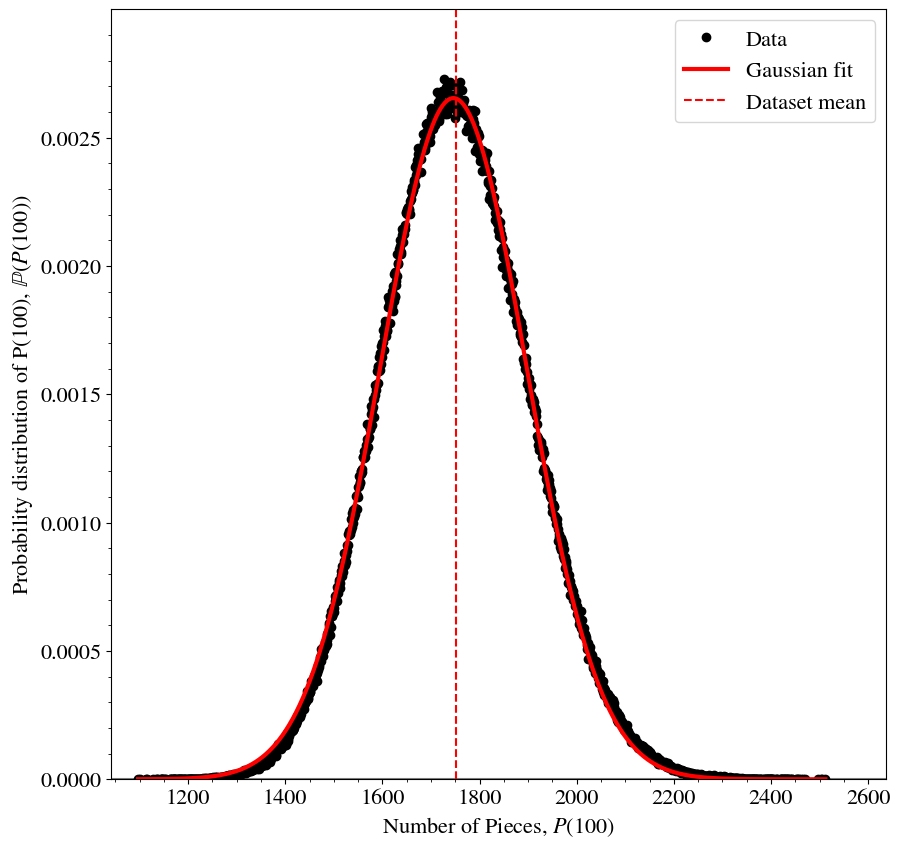

In [37]:
def count_pieces(num_cuts):
    cake_pieces = [list(sort([rand.uniform(0, 2 * pi), rand.uniform(0, 2 * pi)])) for i in range(num_cuts)]
    total_intersections = 0 
    for i in range(num_cuts):
        for j in range(num_cuts - i):
            if (cake_pieces[j][0] < cake_pieces[0][0] < cake_pieces[j][1]) ^ (cake_pieces[j][0] < cake_pieces[0][1] < cake_pieces[j][1]): # XOR conditions
                total_intersections += 1
        cake_pieces.pop(0)
    return total_intersections + num_cuts + 1


def gauss(num_pieces, mu, sigma): # Gaussian model
    return (1 / (sigma * sqrt(2 * pi))) * exp(- 0.5 * ((num_pieces - mu) / sigma) ** 2)


@timing
def main(num_cuts, num_loops):
    simulation = [count_pieces(num_cuts) for i in range(num_loops)] # Obtain 2 million cakes with 100 cuts each
    sim_mean = average(simulation)
    sim_stdev = std(simulation)
    
    histogram = collections.Counter(simulation) # Find frequency distribution
    histogram = dict(sorted(histogram.items()))
    piece_range = array(list(histogram.keys()))
    probability = array(list(histogram.values())) / num_loops
    
    opt_param, cov_matrix = curve_fit(gauss, piece_range, probability, p0=[sim_mean, sim_stdev]) # Fit Gaussian Model
    param_error = sqrt(diag(cov_matrix)) 
    print(f"BEST MODEL:\nMean is {opt_param[0]} ± {param_error[0]}, Standard deviation is {opt_param[1]} ± {param_error[1]}\n")
    
    plt.figure(figsize=(10, 10), dpi=200)
    plt.axvline(color='gray')
    plt.axhline(color='gray')
    plt.minorticks_on()
    plt.xlabel(fr'Number of Pieces, $P({num_cuts})$')
    plt.ylabel(str(fr'Probability distribution of P({num_cuts}), '+ r'$\mathbb{P}(P($'+ f'{num_cuts}'+ '))'))
    plt.xlim(0.95 * min(piece_range), 1.05 * max(piece_range))
    plt.ylim(0, 1.1 * max(probability))
    plt.plot(piece_range, probability, 'ko', label='Data')
    plt.plot(piece_range, gauss(piece_range, *opt_param), 'r-', linewidth=3, label='Gaussian fit')
    plt.axvline(sim_mean, color='r', linestyle='--', label='Dataset mean')
    plt.legend()
    #plt.savefig(f"gaussian_model.png", bbox_inches='tight', dpi=300)
    
    print(f"DATASET:\nLeast pieces encountered: {min(piece_range)}, theoretical minimum: {num_cuts + 1}")
    print(f"Most pieces encountered: {max(piece_range)}, theoretical maximum: {(1 / 2) * (num_cuts * num_cuts + num_cuts + 2)}")
    print(f"Average number of pieces: {sim_mean}, theoretical mean: {(num_cuts * num_cuts + 5 * num_cuts + 1) / 6}")
    print(f"Standard deviation: {sim_stdev}, theoretical st. dev.: {sqrt( sum(power(simulation - sim_mean, 2) / (len(simulation) - 1)))}\n")
    print(f"Mode: {st.mode(simulation)}, Median: {median(simulation)}, Mean: {sim_mean}\n")
    return [piece_range, probability]


piece_range, probability = main(num_cuts = 100, num_loops = int(2e6)) # Change parameters here

Max Height of Cut [3, 5]: 0.4597
Max Height of Cut [1.8, 3.5]: 0.34
Max Height of Cut [0.2, 3.7]: 0.8218


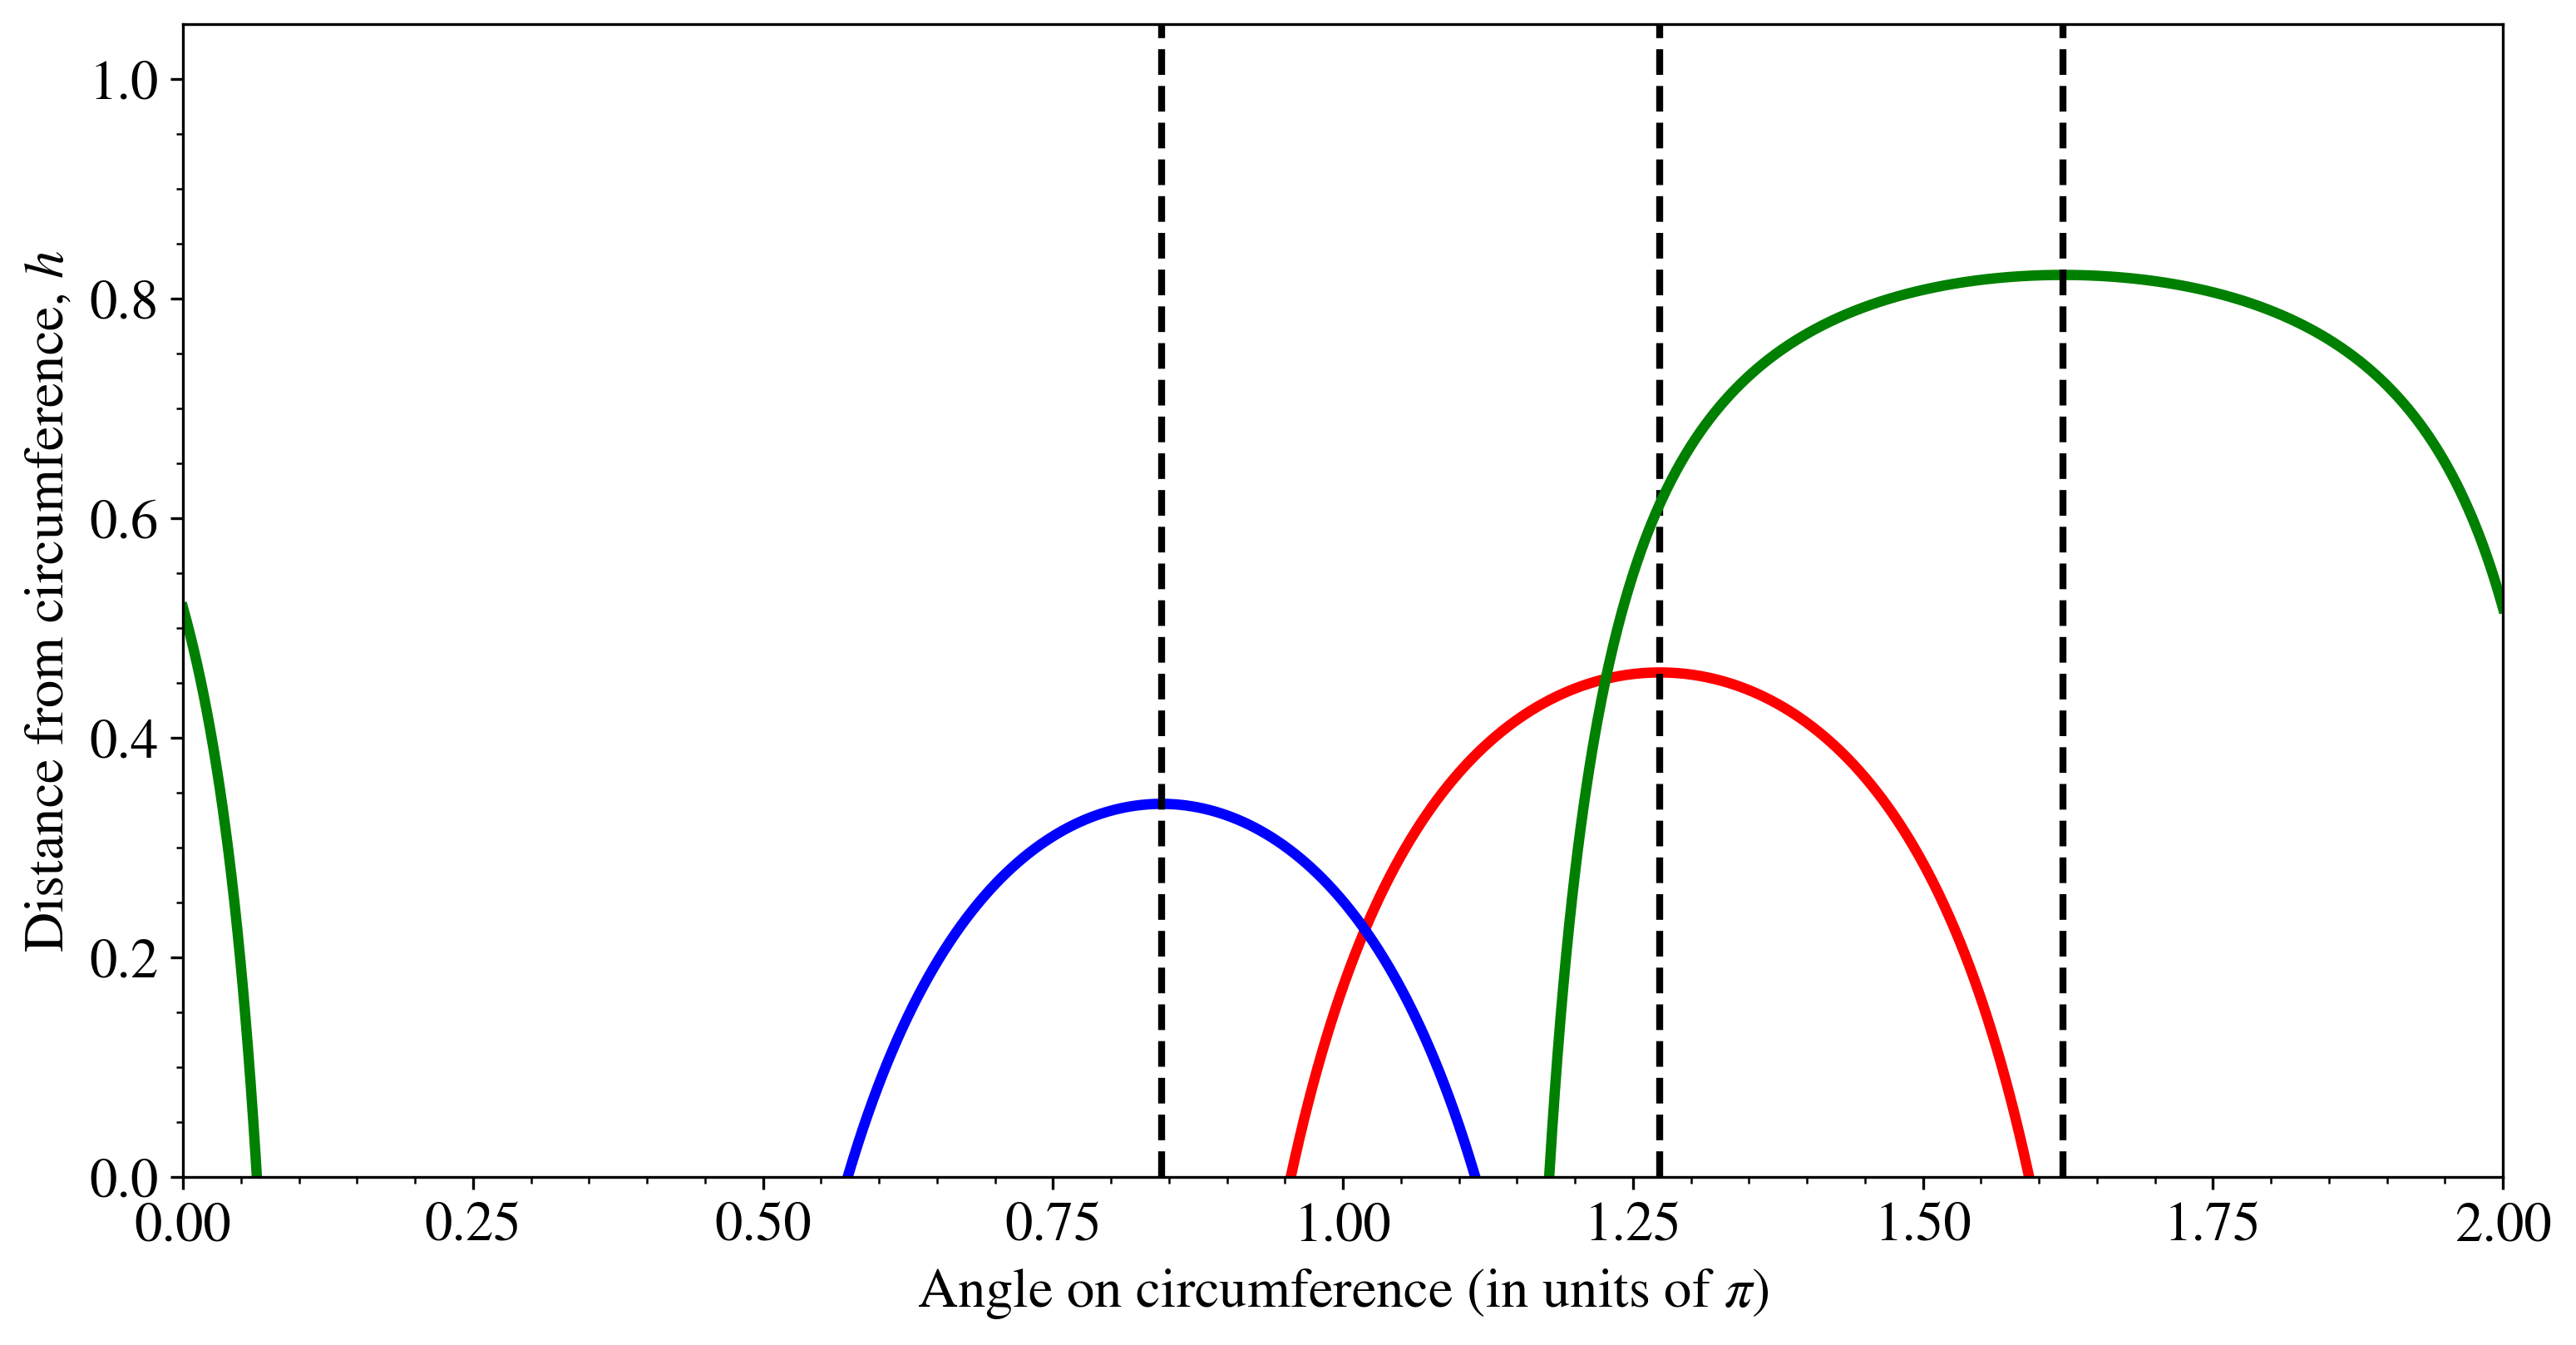

In [22]:
def generate_empty_plot():
    plt.figure(figsize=(12, 6), dpi=300)
    plt.minorticks_on()
    plt.xlim(0, 2)
    plt.ylim(0, 1.05)
    plt.xlabel(fr'Angle on circumference (in units of $\pi$)')
    plt.ylabel(fr'Distance from circumference, $h$')

    
def draw_cut(alpha_1, alpha_2, colour):
    if (alpha_2 - alpha_1) > pi: # Condition when x = 1. The domain splits in two
        
        (beta_1, beta_2) = (alpha_2 -  2 * pi, alpha_1)
        theta_1 = linspace(0, alpha_1, 1000)
        cut_1 = 1 - cos(0.5 * (beta_2 - beta_1)) / cos(0.5 * (beta_2 + beta_1) - theta_1)
        
        (beta_1, beta_2) = (alpha_2, 2 * pi + alpha_1)
        theta_2 = linspace(alpha_2, 2 * pi, 1000)
        cut_2 = 1 -  cos(0.5 * (beta_2 - beta_1)) / cos(0.5 * (beta_2 + beta_1) - theta_2)
        
        plt.plot(theta_1 / pi, cut_1, colour, linewidth=3)
        plt.plot(theta_2 / pi, cut_2, colour, linewidth=3)
        plt.axvline((mean(theta_1) + mean(theta_2)) / pi, color='k', linestyle='--', linewidth=2)
        print(fr"Max Height of Cut [{alpha_1}, {alpha_2}]: {max(concatenate((cut_1, cut_2))):.4}") 
        
    else: # Whenever x = 0, calculate height as usual
        theta = linspace(alpha_1, alpha_2, 1000)
        cut = 1 - (cos(0.5 * (alpha_2 - alpha_1)) / cos(0.5 * (alpha_2 + alpha_1) - theta))
        
        plt.plot(theta / pi, cut, colour, linewidth=3)
        plt.axvline(mean(theta) / pi, color='k', linestyle='--', linewidth=2)
        print(fr"Max Height of Cut [{alpha_1}, {alpha_2}]: {max(cut):.4}")
        

generate_empty_plot()
draw_cut(alpha_1=3, alpha_2=5, colour='r')
draw_cut(alpha_1=1.8, alpha_2=3.5, colour='b')
draw_cut(alpha_1=0.2, alpha_2=3.7, colour='g')
# plt.savefig(f"param.png", bbox_inches='tight', dpi=500)